In [2]:
import psycopg2
import pandas as pd
import credentials_post as creds #pythonfile with postgress credentials
import time
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, wordpunct_tokenize 
nltk.download('punkt')


ModuleNotFoundError: No module named 'credentials_post'

In [ ]:
#CONNECT TO POSTGRES ##
conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
+" password="+ creds.PGPASSWORD

conn=psycopg2.connect(conn_string)

start = time.time()  #start time importing table from postgres

review_table = pd.read_sql('select * from review', con=conn)

end = time.time() #end importing table from postgres
print(end - start)

In [ ]:
##EXPLORE DATA ##

##create lenght column
review_table['text length'] = review_table['review_text'].apply(len)  ##create lenght (character) column

##check column
review_table.columns.tolist()

##create histograms of text lenght by starts
g = sns.FacetGrid(data=review_table, col='stars')  
g.map(plt.hist, 'text length', bins=50)

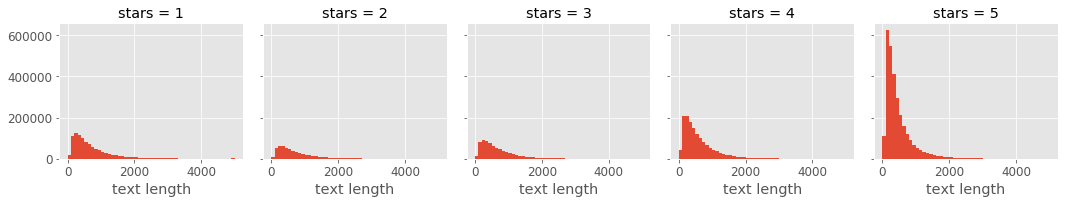

In [ ]:
###CREATE TEST DF ###
review_test = review_table[:1000]

grid_test = sns.FacetGrid(data=review_test, col='stars')  
grid_test.map(plt.hist, 'text length', bins=10)

In [ ]:
## Function to remove stopwords and puntuation ##

def text_process(text):

    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [ ]:
review_table['text_process'] = review_table['review_text'].apply(text_process)
review_table['text_process_words'] = review_table['text_process'].apply(len)  